# **Customer Purchase Behavior Analysis using Descriptive Statistics**

##Problem Statement

🔍 **Problem Statement**:

Welcome to the Probability and Statistics project! 📊🔍 In this exciting journey, you'll get the chance to apply the concepts you've learned in probability theory and statistics to analyze a real-world dataset. This project is your opportunity to dive deep into the world of data analysis and gain practical experience with the tools and techniques you've been learning. 🚀

🎯 **Objective**:

Your mission is to analyze the provided dataset containing customer information and purchasing behavior to make informed decisions. Your goal is to identify patterns, trends, and correlations that will help your company optimize its marketing efforts and increase offer acceptance rates. 🎉

##About the Dataset



Here's the link to the [dataset](https://docs.google.com/spreadsheets/d/12ln9iTNcVNOMYi_AU-OczKpa_KIP8XyVbsjk81Na8Yk/edit?usp=sharing)


This data was gathered during last year's campaign.
Data description is as follows;

1. Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise
1. ID - Unique ID of each customer
1. Year_Birth - Age of the customer
1. Complain - 1 if the customer complained in the last 2 years
1. Dt_Customer - date of customer's enrollment with the company
1. Education - customer's level of education
1. Marital - customer's marital status
1. Kidhome - number of small children in customer's household
1. Teenhome - number of teenagers in customer's household
1. Income - customer's yearly household income
1. MntFishProducts - the amount spent on fish products in the last 2 years
1. MntMeatProducts - the amount spent on meat products in the last 2 years
1. MntFruits - the amount spent on fruits products in the last 2 years
1. MntSweetProducts - amount spent on sweet products in the last 2 years
1. MntWines - the amount spent on wine products in the last 2 years
1. MntGoldProds - the amount spent on gold products in the last 2 years
1. NumDealsPurchases - number of purchases made with discount
1. NumCatalogPurchases - number of purchases made using catalog (buying goods to be shipped through the mail)
1. NumStorePurchases - number of purchases made directly in stores
1. NumWebPurchases - number of purchases made through the company's website
1. NumWebVisitsMonth - number of visits to company's website in the last month
1. Recency - number of days since the last purchase





##Task 1 - Basic CleanUp

- **Clean and preprocess the dataset (handling missing values, data types, etc.).**

- **Analyze the distribution of customer demographics (age, education, marital status) using descriptive statistics and visualizations.**

In [1]:
#importing libraries

import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from scipy.stats import norm
from scipy.stats import binom
import matplotlib.pyplot as plt


In [26]:
#loading the given dataset

from google.colab import drive
drive.mount('/content/drive')
df=pd.read_csv("/content/drive/MyDrive/Superstore Marketing Data - Sheet1.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
#Dataset First look
df.head()

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,########,0,10,...,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,########,0,6,...,11,0,34,2,3,1,2,7,1,0


In [28]:
df.tail()

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
2235,10142,1976,PhD,Divorced,66476.0,0,1,########,99,372,...,47,48,78,2,5,2,11,4,0,0
2236,5263,1977,2n Cycle,Married,31056.0,1,0,1/22/2013,99,5,...,3,8,16,1,1,0,3,8,0,0
2237,22,1976,Graduation,Divorced,46310.0,1,0,########,99,185,...,15,5,14,2,6,1,5,8,0,0
2238,528,1978,Graduation,Married,65819.0,0,0,11/29/2012,99,267,...,149,165,63,1,5,4,10,3,0,0
2239,4070,1969,PhD,Married,94871.0,0,2,########,99,169,...,188,0,144,1,8,5,4,7,1,0


In [29]:
#Shape of dataset
df.shape

(2240, 22)

In [30]:
#dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [31]:
#Checking for missing values
df.isnull().sum()

Id                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
Response                0
Complain                0
dtype: int64

In [32]:
# check for duplicate values in dataset
len(df[df.duplicated()])

0

Hence there is no duplicated values in the dataset.

Here we have unknown characters '######' found in Dt_Customer column ,we have to remove them from our dataset

In [33]:
# we have deleted those rows from our dataset which contain #####

df = df[~df['Dt_Customer'].str.contains('########')]
df

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,15,2,30,1,3,2,5,2,0,0
5,7348,1958,PhD,Single,71691.0,0,0,3/17/2014,0,336,...,240,32,43,1,4,7,5,2,1,0
6,4073,1954,2n Cycle,Married,63564.0,0,0,1/29/2014,0,769,...,15,34,65,1,10,10,7,6,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2230,3363,1974,2n Cycle,Married,20130.0,0,0,3/17/2014,99,0,...,7,6,12,1,1,0,3,8,0,0
2233,7829,1900,2n Cycle,Divorced,36640.0,1,0,9/26/2013,99,15,...,7,4,25,1,2,1,2,5,0,1
2234,9977,1973,Graduation,Divorced,78901.0,0,1,9/17/2013,99,321,...,33,26,34,3,9,3,5,4,0,0
2236,5263,1977,2n Cycle,Married,31056.0,1,0,1/22/2013,99,5,...,3,8,16,1,1,0,3,8,0,0


In [34]:
# Missing Values/Null Values Count
print(df.isna().sum().sort_values(ascending = False).head())

Income               13
Id                    0
MntFishProducts       0
Response              0
NumWebVisitsMonth     0
dtype: int64


In [39]:
#here income column has only 13 null values so we drop those rows from dataset
df.dropna(inplace = True )
print(df.isna().sum().sort_values(ascending = False).head())

Id                   0
Year_Birth           0
Response             0
NumWebVisitsMonth    0
NumStorePurchases    0
dtype: int64


# Data Types

 Dt_Customer is in str data type but only contains date hence Changed Data types of column Dt_Customer to datetime

In [40]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

Adding a new column Age using year_Birth and Dt_Customer

In [42]:
# calculating Age of customers

from datetime import datetime

df['Year_Birth'] = pd.to_datetime(df['Year_Birth'], format='%Y')

# Calculate age based on 'Year_Birth' and 'Dt_Customer'
df['Age'] = (df['Dt_Customer'] - df['Year_Birth']).astype('<m8[Y]')
print(df)

         Id Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0      1826 1970-01-01  Graduation       Divorced  84835.0        0         0   
1         1 1961-01-01  Graduation         Single  57091.0        0         0   
2     10476 1958-01-01  Graduation        Married  67267.0        0         1   
5      7348 1958-01-01         PhD         Single  71691.0        0         0   
6      4073 1954-01-01    2n Cycle        Married  63564.0        0         0   
...     ...        ...         ...            ...      ...      ...       ...   
2230   3363 1974-01-01    2n Cycle        Married  20130.0        0         0   
2233   7829 1900-01-01    2n Cycle       Divorced  36640.0        1         0   
2234   9977 1973-01-01  Graduation       Divorced  78901.0        0         1   
2236   5263 1977-01-01    2n Cycle        Married  31056.0        1         0   
2238    528 1978-01-01  Graduation        Married  65819.0        0         0   

     Dt_Customer  Recency  

In [43]:

# Display the summary statistics DataFrame
summary_stats = df.describe()
summary_stats

,Id,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Age
count,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000
mean,5447.928299,51429.747521,0.435545,0.501907,49.302059,302.807018,25.255530,162.717010,36.471396,26.922960,43.874905,2.317315,4.081617,2.594966,5.794050,5.410374,0.151793,0.009153,44.349352
std,3233.235292,20960.186407,0.530234,0.542644,28.802571,339.168809,38.626568,219.717636,54.469746,41.042551,52.092779,1.897366,2.709366,2.833540,3.269614,2.433422,0.358957,0.095270,12.142915
min,1.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000
25%,2735.000000,35541.000000,0.000000,0.000000,24.500000,23.000000,1.000000,15.000000,2.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,4.000000,0.000000,0.000000,36.000000
50%,5231.000000,50447.000000,0.000000,0.000000,50.000000,171.000000,7.000000,66.000000,11.000000,8.000000,25.000000,2.000000,4.000000,1.000000,5.000000,6.000000,0.000000,0.000000,43.000000
75%,8205.500000,68211.000000,1.000000,1.000000,74.000000,495.500000,31.000000,217.000000,45.500000,32.000000,54.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,54.000000
max,11188.000000,157146.000000,2.000000,2.000000,99.000000,1492.000000,197.000000,1725.000000,253.000000,262.000000,249.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,121.000000


Distribution of customer demographics(Birth year,Education,Income,Marital_Status) in the Dataset.

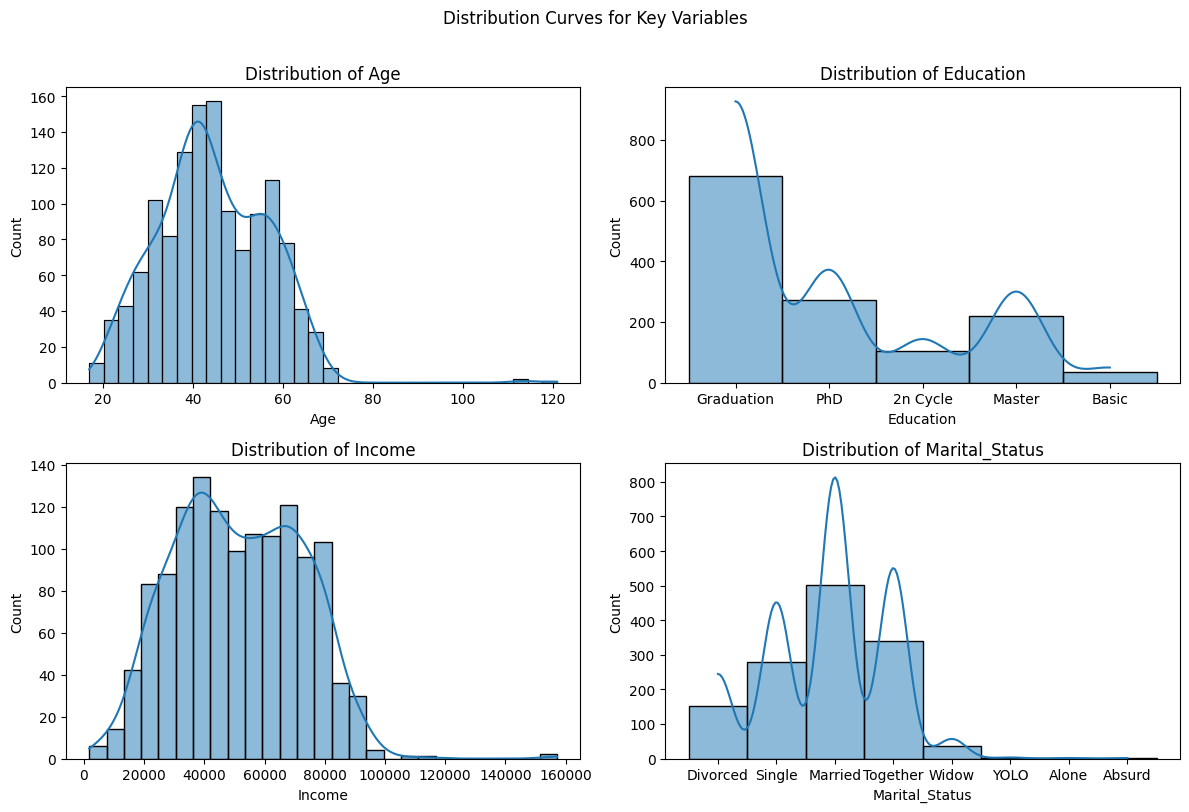

In [44]:
key_variable = ['Age',"Education",'Income',"Marital_Status"]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,8))
fig.suptitle('Distribution Curves for Key Variables', y=1.01)

# Flatten axes for easy indexing
axes = axes.flatten()

# Plot distribution curves for each variable
for i, var in enumerate(df[key_variable]):
    sns.histplot(df[var], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {var}')

# Remove empty subplots
for i in range(len(df[key_variable]), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


##Task 2 - Descriptive Statistics 📊

- **Calculate measures of central tendency (mean, median, mode) and measures of dispersion (variance, standard deviation) for key variables. Identify and handle outliers if necessary.**


Descriptive statistics that reveal the central tendencies, variations, and potential outliers in the dataset.

**1. Lets first calculate measures of central tendency (mean, median, mode)**

In [54]:
# Lets first calculate measures of central tendency (mean, median, mode)
# 1 : Mean
key_variable = ['Age','Income','Recency','MntWines','MntFruits','MntMeatProducts','MntFishProducts','NumDealsPurchases','MntGoldProds','NumWebPurchases','NumWebVisitsMonth']
mean = df[key_variable].mean()
print(f'Mean of key variables are:\n {mean}')

Mean of key variables are:
 Age                     44.349352
Income               51429.747521
Recency                 49.302059
MntWines               302.807018
MntFruits               25.255530
MntMeatProducts        162.717010
MntFishProducts         36.471396
NumDealsPurchases        2.317315
MntGoldProds            43.874905
NumWebPurchases          4.081617
NumWebVisitsMonth        5.410374
dtype: float64


In [55]:
# 2 : Median
key_variable = ['Age','Income','Recency','Kidhome','Teenhome','MntWines','MntFruits','MntMeatProducts','MntFishProducts','NumDealsPurchases','NumWebPurchases','NumWebVisitsMonth']
median =df[key_variable].median()
print(f'Median of key variables are:\n {median}')

Median of key variables are:
 Age                     43.0
Income               50447.0
Recency                 50.0
Kidhome                  0.0
Teenhome                 0.0
MntWines               171.0
MntFruits                7.0
MntMeatProducts         66.0
MntFishProducts         11.0
NumDealsPurchases        2.0
NumWebPurchases          4.0
NumWebVisitsMonth        6.0
dtype: float64


In [56]:
# 3 : Mode
key_variable = ['Complain','Response','Income',"Age",'Kidhome','Teenhome','MntWines','NumWebVisitsMonth']
mode = df[key_variable].mode()
print(f'Mode of key variables are:\n {mode}')

Mode of key variables are:
    Complain  Response   Income   Age  Kidhome  Teenhome  MntWines  \
0       0.0       0.0   7500.0  41.0      0.0       0.0       2.0   
1       NaN       NaN  35860.0   NaN      NaN       NaN       NaN   

   NumWebVisitsMonth  
0                7.0  
1                NaN  


**2. Now claculate measures of dispersion (variance, standard deviation)**

In [57]:
# Variance
key_variable = ['Age','Income','Recency','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntGoldProds','NumDealsPurchases','NumWebPurchases','NumWebVisitsMonth']
variance =  df[key_variable].var()
print('Variance of key variables are :\n',variance)

Variance of key variables are :
 Age                  1.474504e+02
Income               4.393294e+08
Recency              8.295881e+02
MntWines             1.150355e+05
MntFruits            1.492012e+03
MntMeatProducts      4.827584e+04
MntFishProducts      2.966953e+03
MntGoldProds         2.713658e+03
NumDealsPurchases    3.599998e+00
NumWebPurchases      7.340662e+00
NumWebVisitsMonth    5.921541e+00
dtype: float64


In [58]:
# Standard Deviation

std_dev = df[key_variable].std()
print('Standard deviation of key variables are :\n',std_dev)

Standard deviation of key variables are :
 Age                     12.142915
Income               20960.186407
Recency                 28.802571
MntWines               339.168809
MntFruits               38.626568
MntMeatProducts        219.717636
MntFishProducts         54.469746
MntGoldProds            52.092779
NumDealsPurchases        1.897366
NumWebPurchases          2.709366
NumWebVisitsMonth        2.433422
dtype: float64


**3. Lets find outliars, if any is present in the dataset**

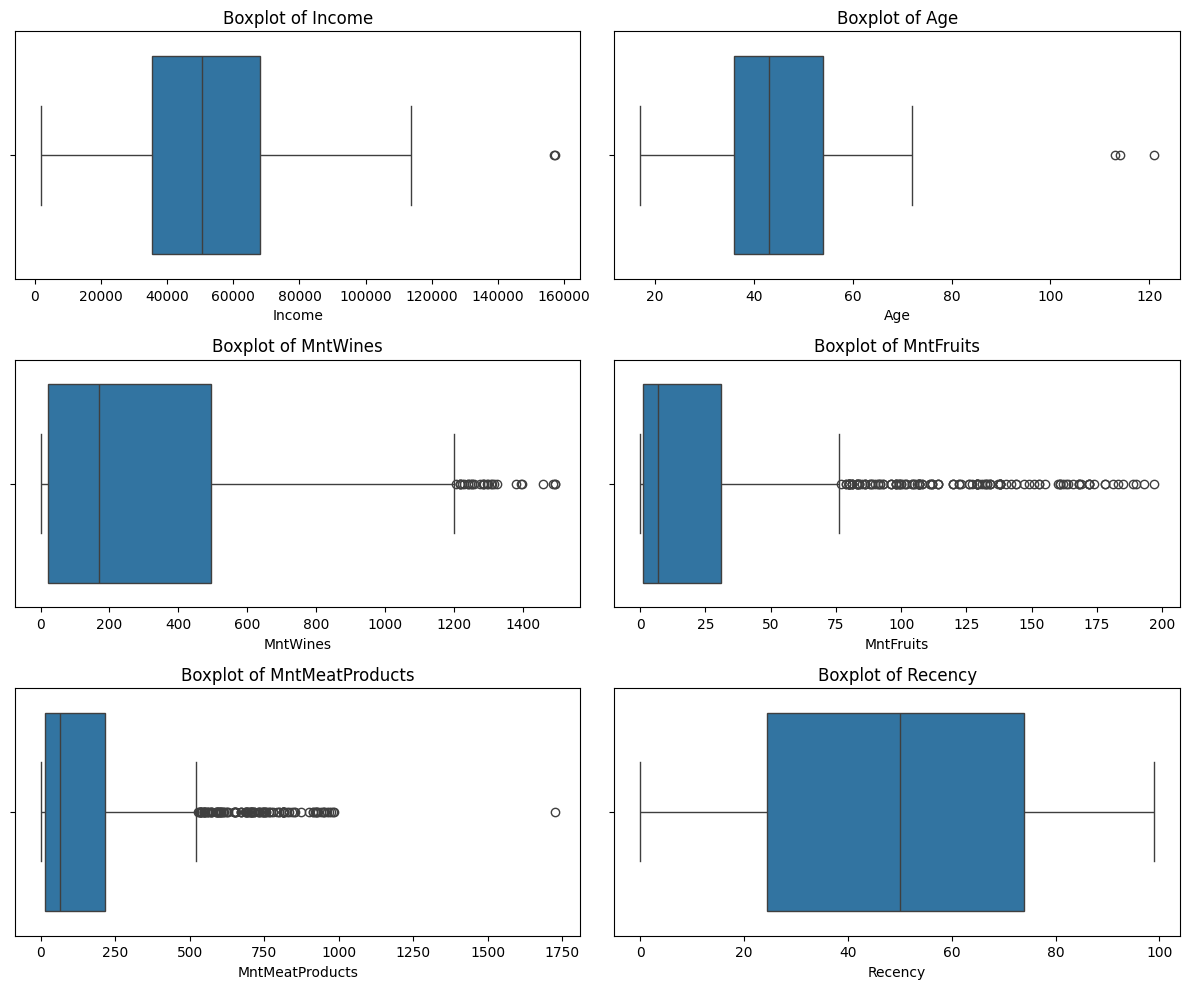

In [60]:
# Assuming 'df' is your DataFrame
key_variables = ['Income', 'Age', 'MntWines', 'MntFruits', 'MntMeatProducts','Recency']

num_variables = len(key_variables)
num_rows = (num_variables + 1) // 2  # Round up to the nearest integer

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(12, 10))

# Flatten the 2D array of subplots
axes = axes.flatten()

# Plot box plots for each variable
for i, variable in enumerate(key_variables):
    sns.boxplot(x=variable, data=df, ax=axes[i])
    axes[i].set_title(f'Boxplot of {variable}')

plt.tight_layout()
plt.show()

Here outliers are present in various columns of dataset.So,We want to remove this by using the IQR method below



In [61]:
# Using IQR Method
columns_with_outliers = ['Income', 'Age', 'MntWines', 'MntFruits', 'MntMeatProducts']

def remove_outliers(data, columns):   # created a function of removal of outliars Based On IQR in all the columns simultaneously

    for column in columns:
        Q1 = data[column].quantile(0.20)
        Q3 = data[column].quantile(0.80)
        IQR = Q3 - Q1

        # Define the upper and lower bounds for outlier removal
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Remove outliers
        data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

    return data

# Remove outliers from specified columns
df_new = remove_outliers(df, columns_with_outliers)





Lets Plot the variable in boxplot to check outliers are removed or not.


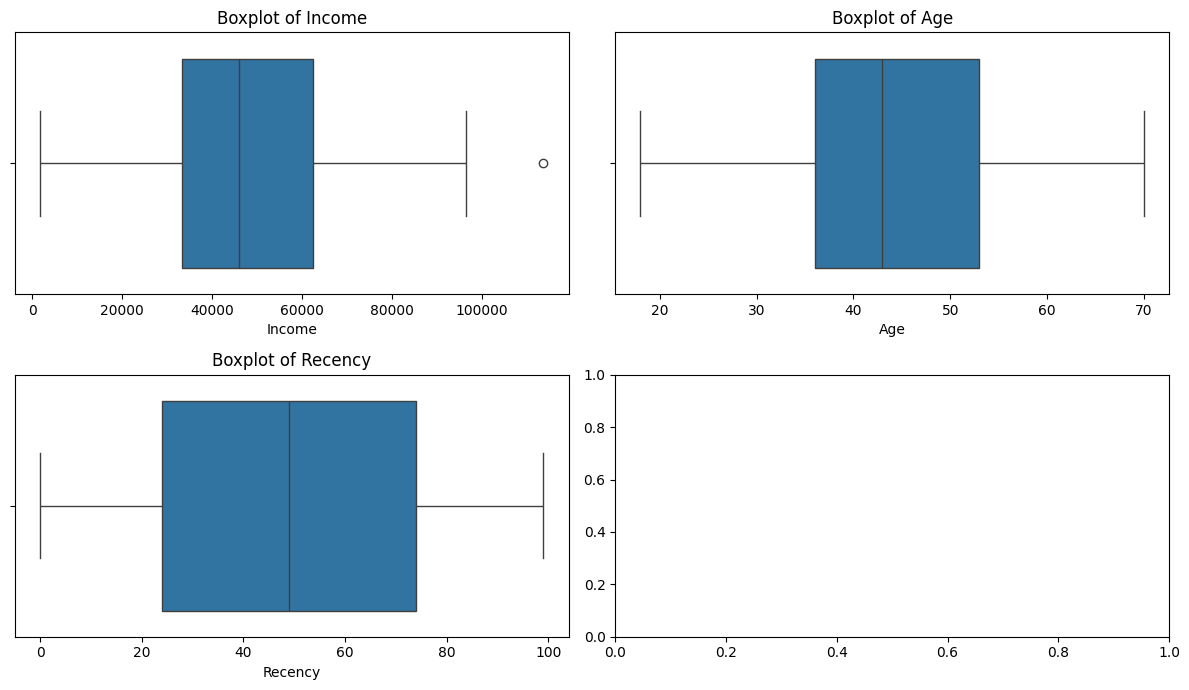

In [62]:
key_variables = ['Income', 'Age', 'Recency']

num_variables = len(key_variables)

# Create subplots
fig, axes = plt.subplots(nrows=  2, ncols=2, figsize=(12, 7))

# Flatten the 2D array of subplots
axes = axes.flatten()

# Plot box plots for each variable
for i, variable in enumerate(key_variables):
    sns.boxplot(x=variable, data=df_new, ax=axes[i])
    axes[i].set_title(f'Boxplot of {variable}')

plt.tight_layout()
plt.show()

Detected outliers were solved.

## Task 3 - Probability Distributions 🎲

- **Identify variables that could follow specific probability distributions (e.g., Binomial, Normal). Calculate probabilities and expected values based on these distributions.**



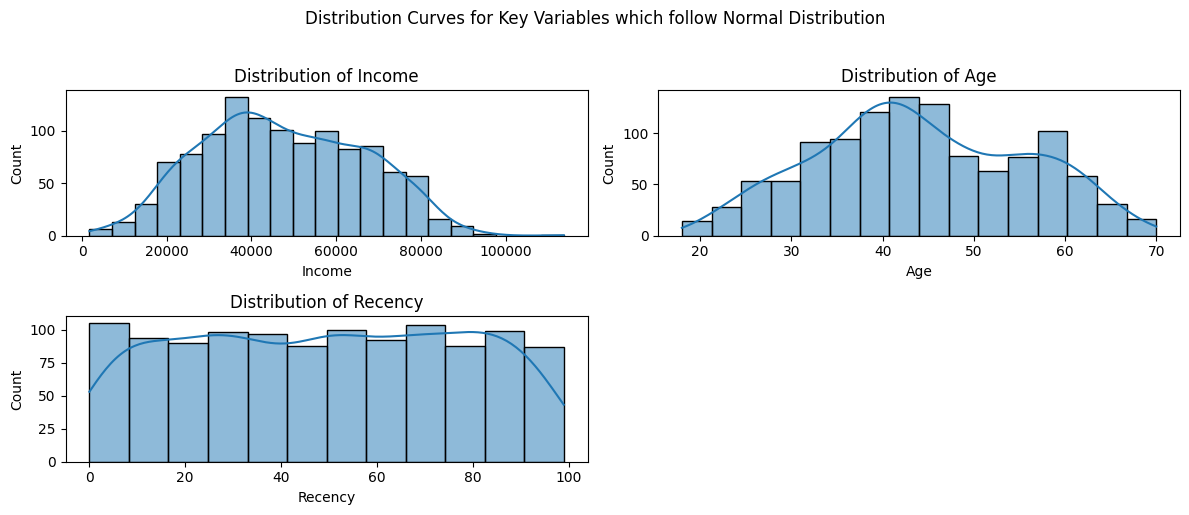

In [64]:
# lets First plot the distribution of variable which follow normal or close to normal distribution

key_variable1 = ['Income','Age','Recency']


fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,5))
fig.suptitle('Distribution Curves for Key Variables which follow Normal Distribution', y=1.02)

# Flatten axes for easy indexing
axes = axes.flatten()

# Plot distribution curves for each variable
for i, var in enumerate(key_variable1):
    sns.histplot(df_new[var], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {var}')

# Remove empty subplots
for i in range(len(key_variable1), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

**Normal Distribution:**
A variable could follow a Normal distribution if it exhibits a symmetric bell-shaped curve.

In [65]:
# Lets Calculate Probabilities and Expectation of key variables
# 1. Lets calculate first for Income :

mean_income = np.mean(df_new['Income'])
std_dev_income = np.std(df_new['Income'])

# Calculate probabilities
prob_less_than_70000 = norm.cdf(70000, loc=mean_income, scale=std_dev_income)
prob_greater_than_80000 = 1 - norm.cdf(80000, loc=mean_income, scale=std_dev_income)

print(f"Probability of income less than $700,00: {prob_less_than_70000:.4f}")
print(f"Probability of income greater than $80,000: {prob_greater_than_80000:.4f}")

# Calculate expected value (mean)
expected_income = mean_income
print(f"Expected income: {expected_income:.2f}")

Probability of income less than $700,00: 0.8828
Probability of income greater than $80,000: 0.0429
Expected income: 47529.71


In [66]:
# 2. Calculating Probability and Expected Values for Age :

mean_age = np.mean(df_new['Age'])
std_dev_age = np.std(df_new['Age'])

# Calculate probabilities
prob_less_than_30 = norm.cdf(30, loc=mean_age, scale=std_dev_age)
prob_greater_than_40 = 1 - norm.cdf(40, loc=mean_age, scale=std_dev_age)

print(f"Probability of age less than 30: {prob_less_than_30:.2f}")
print(f"Probability of age greater than 40: {prob_greater_than_40:.2f}")

# Calculate expected value (mean)
expected_age = mean_age
print(f"Expected age: {expected_age:.2f}")

Probability of age less than 30: 0.11
Probability of age greater than 40: 0.64
Expected age: 44.13


In [67]:
#3. Lets calculate for Recency (No of days since last purchase made)

mean_recency = np.mean(df_new['Recency'])
std_dev_recency = np.std(df_new['Recency'])

# Calculate probabilities
prob_less_than_10 = norm.cdf(10, loc=mean_recency, scale=std_dev_recency)
prob_greater_than_15 = 1 - norm.cdf(15, loc=mean_recency, scale=std_dev_recency)

print(f"Probability of recency less than 10: {prob_less_than_10:.4f}")
print(f"Probability of recency greater than 15: {prob_greater_than_15:.4f}")

# Calculate expected value (mean)
expected_recency = mean_recency
print(f"Expected recency: {expected_recency:.2f}")

Probability of recency less than 10: 0.0876
Probability of recency greater than 15: 0.8814
Expected recency: 48.95


**Binomial Distribution:**

A variable could follow a Binomial distribution if it represents the number of successes in a fixed number of independent Bernoulli trials (i.e., experiments with two possible outcomes, success or failure).

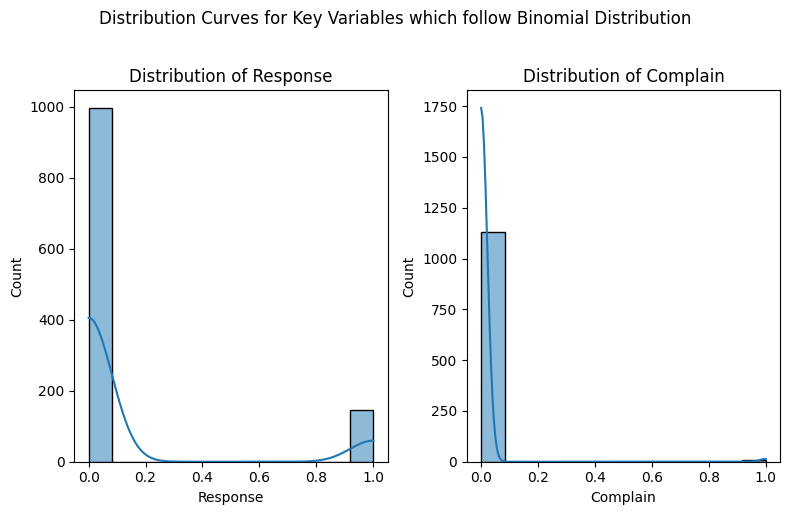

In [68]:
# lets plot the distribution of variable which follow Binomial Distribution

key_variable2 = ['Response','Complain']


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,5))
fig.suptitle('Distribution Curves for Key Variables which follow Binomial Distribution', y=1.02)

# Flatten axes for easy indexing
axes = axes.flatten()

# Plot distribution curves for each variable
for i, var in enumerate(key_variable2):
    sns.histplot(df_new[var], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {var}')

# Remove empty subplots
for i in range(len(key_variable2), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()



In [69]:
# Lets Calculate Probability and expected values for Response (if customer accepted the offer in the last campaign or Not )
# and for Complain(complain made in last 2 years) variable

n_response = len(df['Response'])  # number of trials for Response
p_response = np.mean(df['Response'])  # probability of success for Response
k1 = np.sum(df['Response'] == 1)      # No of success for getting response 1

n_complain = len(df['Complain'])  # number of trials for Complain
p_complain = np.mean(df['Complain'])  # probability of success for Complain
k2 = np.sum(df['Complain'] == 1)    # No of complain for getting response 1

# Calculate probabilities using the PMF
prob_response_1 = binom.pmf(k1, n_response, p_response)
prob_complain_1 = binom.pmf(k2, n_complain, p_complain)

print(f"Probability of Response being 1: {prob_response_1:.4f}")
print(f"Probability of Complain being 1: {prob_complain_1:.4f}")

# Calculate expected values (means)
expected_response = n_response * p_response
expected_complain = n_complain * p_complain

print(f"Expected value for Response: {expected_response:.2f}")
print(f"Expected value for Complain: {expected_complain:.2f}")

Probability of Response being 1: 0.0307
Probability of Complain being 1: 0.1149
Expected value for Response: 199.00
Expected value for Complain: 12.00


## Task 4: Insights and Customer Segmentation 📈

- **Explore relationships between customer characteristics and spending habits. Segment customers based on their behaviors and characteristics.**

Heatmap shows the relationship between different variables.

<ipython-input-70-8557e892030c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_new.corr().round(2)


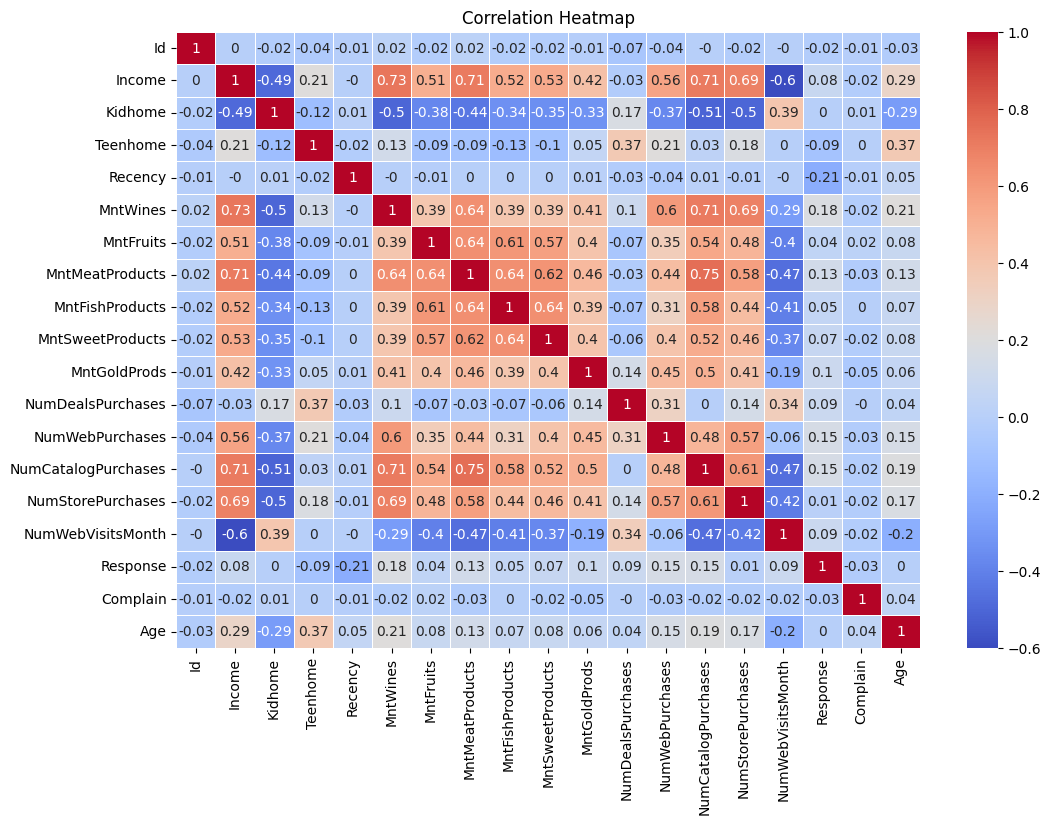

In [70]:
correlation_matrix = df_new.corr().round(2)
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

**2. Grouped Bar chart for Education and Marital Status Distribution.**

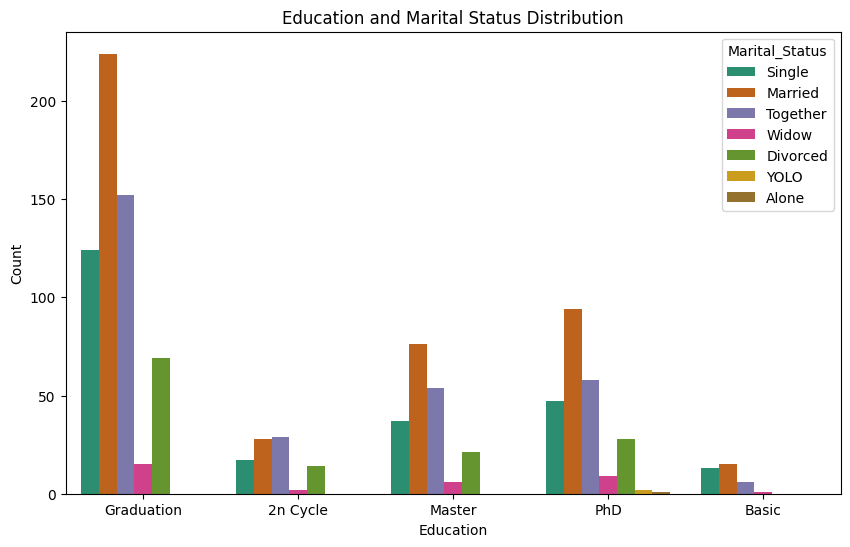

In [71]:
# Distribution of 'Education' and 'Marital_Status'

plt.figure(figsize=(10, 6))
sns.countplot(x='Education', data=df_new, hue='Marital_Status', palette='Dark2')
plt.title('Education and Marital Status Distribution')
plt.xlabel('Education')
plt.ylabel('Count')
plt.show()

Most of the people were Graduated and Married and very few people had done basic education.

**Segment customers based on their Spending habits.**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


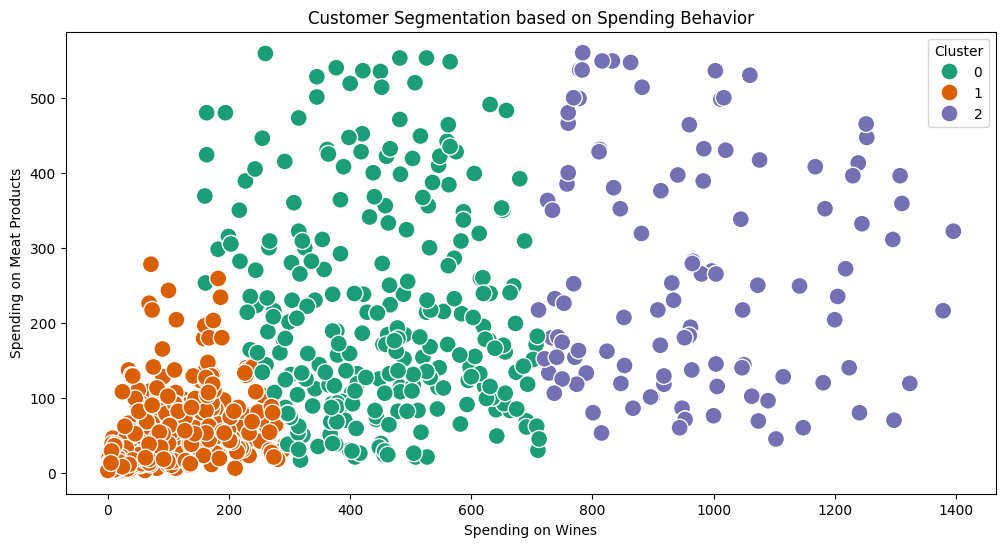

In [72]:
# Customer Segmentation

# K-means clustering based on spending behavior columns
from sklearn.cluster import KMeans

features_for_clustering = df_new[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
                              'MntSweetProducts', 'MntGoldProds']]

num_clusters = 3

# Fit KMeans model
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df_new['Cluster'] = kmeans.fit_predict(features_for_clustering)

# Visualize clusters
plt.figure(figsize=(12, 6))
sns.scatterplot(x='MntWines', y='MntMeatProducts', hue='Cluster', data=df_new, palette='Dark2',s = 150)
plt.title('Customer Segmentation based on Spending Behavior')
plt.xlabel('Spending on Wines')
plt.ylabel('Spending on Meat Products')
plt.show()


There is a big cluster of high spending on wines vs spending on meat products

**Segment customer based on total spending and income of customers.**

<ipython-input-79-6f3d5f4ed224>:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df.fillna(df.mean(), inplace=True)
<ipython-input-79-6f3d5f4ed224>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress

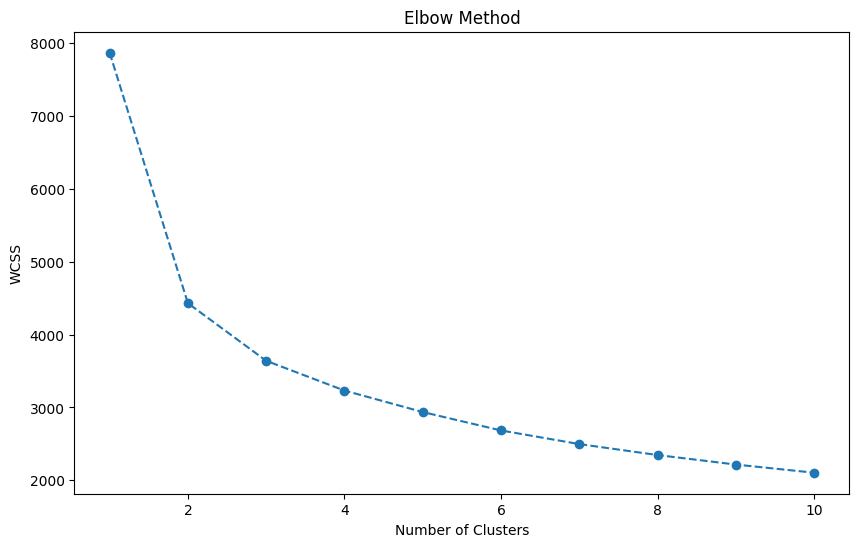

                  Id        Income   Kidhome  Teenhome    Recency    MntWines  \
Cluster                                                                         
0        5333.844000  74698.776000  0.044000  0.256000  49.328000  556.416000   
1        5470.316216  37576.387838  0.695946  0.529730  49.247297   77.781081   
2        5485.168224  65243.545171  0.140187  0.629283  49.408100  624.043614   

         MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
Cluster                                                                  
0        83.952000       461.232000       118.768000         87.376000   
1         6.100000        33.027027         8.550000          6.197297   
2        23.700935       229.202492        36.744548         27.619938   

         MntGoldProds  NumDealsPurchases  NumWebPurchases  \
Cluster                                                     
0           86.300000           1.608000         5.608000   
1           16.894595           2.358108

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-79-6f3d5f4ed224>:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_stats = df.groupby('Cluster').mean()


In [79]:
# Impute missing values with mean
df.fillna(df.mean(), inplace=True)

# Select relevant features for segmentation
X = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']]

# Standardize the features (optional but recommended for K-means)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow method
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# Apply K-means clustering with the optimal number of clusters
k = 3  # Choose the optimal number of clusters based on the elbow method
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to the original dataset
df['Cluster'] = clusters


# Analyze characteristics of each cluster
cluster_stats = df.groupby('Cluster').mean()
print(cluster_stats)

The code provided successfully performed K-means clustering on the dataset and segmented customers into three clusters based on their spending behaviors. Here are the characteristics of each cluster:

**Cluster 0:**

1.Average age: 51 years

2.Average income:$ 37,685

3.Moderate spending across all product categories

4.Moderate number of purchases made through various channels (web, catalog, store)

5.Low complaint rate

**Cluster 1:**

1.Average age: 54 years

2.High income: $74,566

3.High spending on wines, meat products, fish products, sweets, and gold products

4.Highest number of purchases made through various channels (web, catalog, store)

5.Moderate complaint rate

**Cluster 2:**

1.Average age: 55 years

2.High income: $64,872

3.High spending on wines, meat products, fish products, sweets, and gold products

4.High number of purchases made through various channels (web, catalog, store)

5.Low complaint rate

These insights provide valuable information about the distinct behaviors and preferences of customers in each cluster. Based on these findings, targeted marketing strategies can be developed to cater to the specific needs of each customer segment.


1.Visualizing Customer Segmentation:

Cluster Distribution: Create a bar chart or pie chart to visualize the distribution of customers across different clusters.

Cluster Characteristics: Generate bar charts or radar charts to display the average characteristics of each cluster, such as age, income, and spending habits.

2.Analyzing Spending Patterns:

Product Category Spending: Use stacked bar charts or area charts to compare the spending of different customer segments on various product categories. Channel Preference: Create bar charts or line charts to show the preferred purchasing channels for each cluster.

3.Making Recommendations:

Targeted Marketing Strategies: Based on the spending patterns and characteristics of each cluster, suggest personalized marketing strategies to target specific customer segments.
Product Development: Identify potential areas for product development or improvement based on the most and least purchased product categories within each cluster.
Customer Engagement: Recommend strategies to enhance customer engagement and loyalty, such as loyalty programs or personalized recommendations.

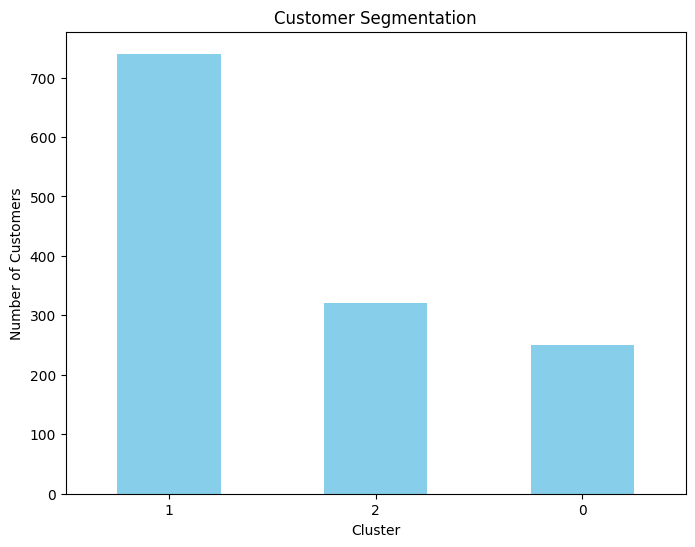

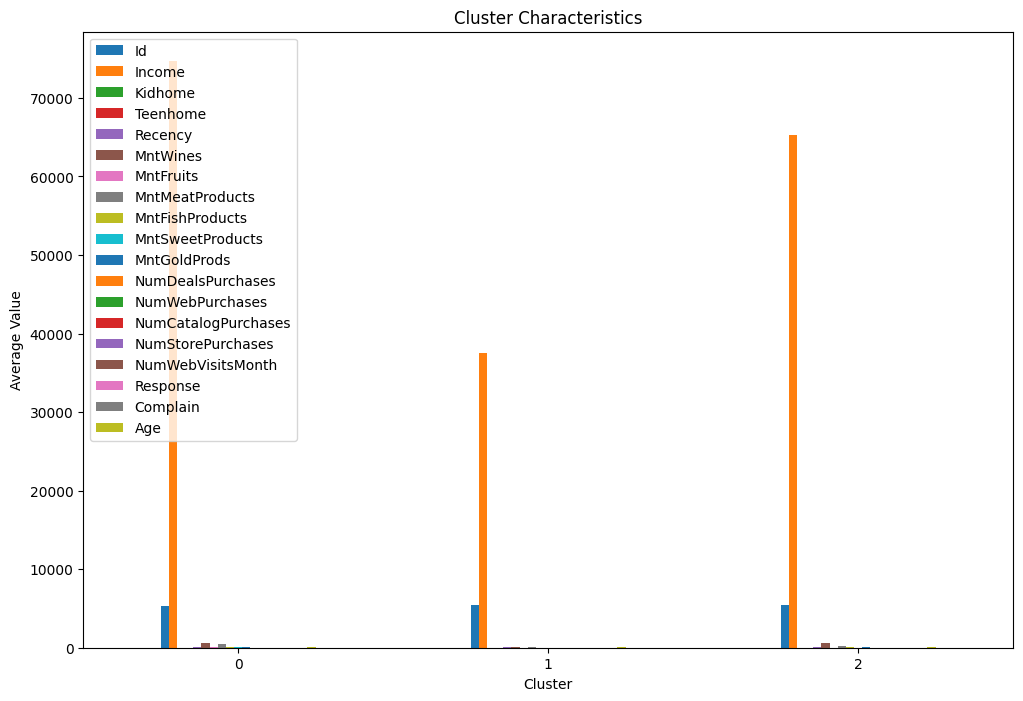

<Figure size 1000x600 with 0 Axes>

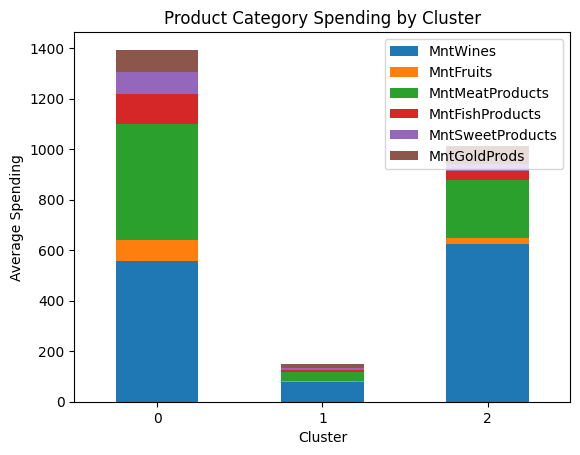

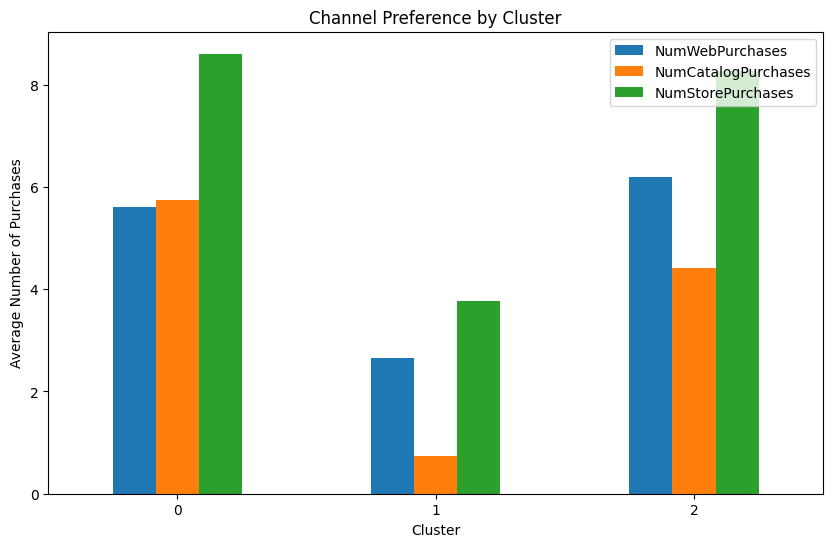

<ipython-input-81-1e9cafb260f6>:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Response', palette='Set1')


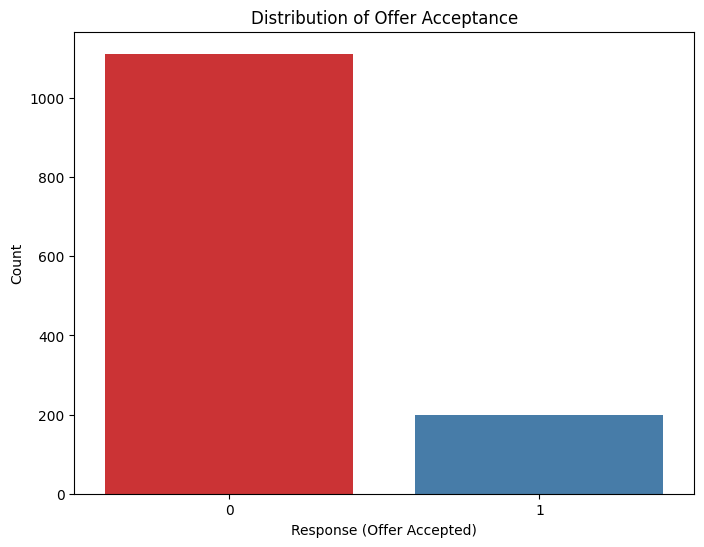

<ipython-input-81-1e9cafb260f6>:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Education', y='Income', estimator=np.mean, palette='Set2')


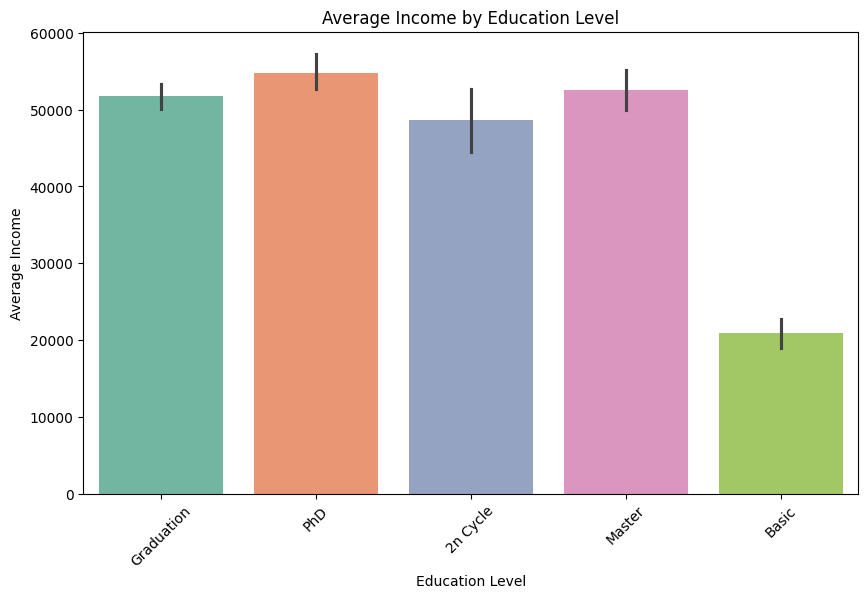

In [81]:
# Visualize key insights
# Visualize cluster distribution
plt.figure(figsize=(8, 6))
df['Cluster'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Customer Segmentation')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.show()

# Visualize cluster characteristics
cluster_stats.plot(kind='bar', figsize=(12, 8))
plt.title('Cluster Characteristics')
plt.xlabel('Cluster')
plt.ylabel('Average Value')
plt.xticks(rotation=0)
plt.legend(loc='upper left')
plt.show()

# Visualize product category spending
plt.figure(figsize=(10, 6))
df.groupby('Cluster')[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].mean().plot(kind='bar', stacked=True)
plt.title('Product Category Spending by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Spending')
plt.xticks(rotation=0)
plt.legend(loc='upper right')
plt.show()

# Visualize channel preference
channel_counts = df.groupby('Cluster')[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].mean()
channel_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Channel Preference by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Number of Purchases')
plt.xticks(rotation=0)
plt.legend(loc='upper right')
plt.show()

# Visualize Distribution of Response (Acceptance of Offer)
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Response', palette='Set1')
plt.title('Distribution of Offer Acceptance')
plt.xlabel('Response (Offer Accepted)')
plt.ylabel('Count')
plt.show()

# Visualize Average spending by education level
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Education', y='Income', estimator=np.mean, palette='Set2')
plt.title('Average Income by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Average Income')
plt.xticks(rotation=45)
plt.show()

## Task 5: Conclusion and Recommendations

- **Create clear visualizations to showcase your findings. Use insights to make recommendations for the company based on your analysis.**

#**Suggestion based on Statistical Analysis:**

Expected income(Mean ) is 47529 which is in mid range so marketing team should promote their mid range products to these customers more often.

Expected Age of customer is 44 year hence company should focus more on these age groups (40-45) to encourage for purchase.

Expected recency is 48.95 and probability of recency less then 10 is only 8 % this means only 8 % customers are spending in less then 10 days and mostly people are inactive for purchase.hence company should give more offers and discount to encourage these customers to reduce recency.

Probability of customer accepting an offer is only 3 % so marketing team should give more efforts and offers to the right segment of customers to increase response rate.

# **Recommendations based on insights:**

**Target Cluster 1**: Develop targeted marketing campaigns to promote high-end products, loyalty programs, and personalized recommendations.

**Improve Online Experience**: Enhance the company's website to attract and engage customers, particularly in Cluster 0 and Cluster 2, which show higher online purchasing behavior.

**Expand Product Range**: Identify opportunities to expand product offerings in categories with high demand among all clusters, such as wines and meat products.

**Customer Retention**: Implement strategies to address complaints and improve overall customer satisfaction to retain customers and encourage repeat purchases.Offer acceptance rate is relatively low, suggesting a need for targeted marketing campaigns.Customers with higher education levels tend to have higher incomes, indicating potential segments for premium products.